In [146]:
import jax.numpy as jnp
import numpy as np
import time
import gymnasium as gym
import sys
sys.path.append("..")
import exciting_environments as excenv
from exciting_environments import GymWrapper
from jax.tree_util import tree_flatten, tree_unflatten, tree_structure

In [148]:
pend=excenv.Pendulum(batch_size=5,action_constraints={"torque":jnp.array([10,20,30,40,50])})
gym_pend=GymWrapper(env=pend)

In [149]:
jnp.array(tree_flatten(pend.env_properties.action_constraints)[0]).T

Array([[10],
       [20],
       [30],
       [40],
       [50]], dtype=int32)

In [150]:
jnp.array(list(
                pend.env_properties.action_constraints.__dict__.values()
            )).T

Array([[10],
       [20],
       [30],
       [40],
       [50]], dtype=int32)

In [151]:
pend.init_states()

ClassicCoreEnvironment.States(physical_states=Pendulum.PhysicalStates(theta=Array([3.1415927, 3.1415927, 3.1415927, 3.1415927, 3.1415927],      dtype=float32, weak_type=True), omega=Array([0., 0., 0., 0., 0.], dtype=float32)), PRNGKey=None, optional=None)

In [202]:
gym_pend.reset()

(Array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32),
 {})

In [194]:
gym_pend.step(action=jnp.ones(5).reshape(-1,1))

(Array([[-1.00e+00,  2.50e-04],
        [-1.00e+00,  1.00e-03],
        [-1.00e+00,  2.25e-03],
        [-1.00e+00,  4.00e-03],
        [-1.00e+00,  6.25e-03]], dtype=float32),
 Array([[ 11.000001],
        [ 41.000004],
        [ 91.000015],
        [161.00002 ],
        [251.00002 ]], dtype=float32),
 Array([[False],
        [False],
        [False],
        [False],
        [False]], dtype=bool),
 Array([[False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False]], dtype=bool))

In [203]:
states=[]
for _ in range(1500):
    obs,_,_,_=gym_pend.step(action=jnp.ones(5).reshape(-1,1))
    states.append(obs[0,0]*jnp.pi)
for _ in range(100000):
    obs,_,_,_=gym_pend.step(action=jnp.zeros(5).reshape(-1,1))
    states.append(obs[0,0]*jnp.pi)

In [204]:
states=jnp.array(states)

In [205]:
import matplotlib.pyplot as plt

(-1.0, 1.0)

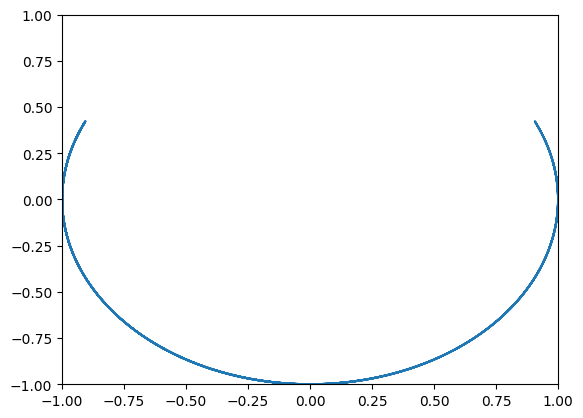

In [207]:
plt.plot(jnp.sin(states),jnp.cos(states))
plt.xlim(-1,1)
plt.ylim(-1,1)

### Simulate Ahead

In [21]:
pend=excenv.Pendulum(batch_size=5,action_constraints={"torque":20})
init_obs,init_states=pend.reset()

In [22]:
actions=jnp.full((5,6),20)

In [23]:
obs=pend.vmap_simulate_ahead(init_states=init_states,actions=actions,init_obs=init_obs)

AttributeError: 'Pendulum' object has no attribute 'vmap_simulate_ahead'

In [ ]:
obs

Array([[[ 1.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00]],

       [[-1.00000000e+00,  4.99999987e-05],
        [-1.00000000e+00,  4.99999987e-05],
        [-1.00000000e+00,  4.99999987e-05],
        [-1.00000000e+00,  4.99999987e-05],
        [-1.00000000e+00,  4.99999987e-05]],

       [[-1.00000000e+00,  1.00000005e-04],
        [-1.00000000e+00,  1.00000005e-04],
        [-1.00000000e+00,  1.00000005e-04],
        [-1.00000000e+00,  1.00000005e-04],
        [-1.00000000e+00,  1.00000005e-04]],

       [[-1.00000000e+00,  1.50000022e-04],
        [-1.00000000e+00,  1.50000022e-04],
        [-1.00000000e+00,  1.50000022e-04],
        [-1.00000000e+00,  1.50000022e-04],
        [-1.00000000e+00,  1.50000022e-04]],

       [[-9.99999940e-01,  2.00000009e-04],
        [-9.99999940e-01,  2.00000009e-04],
        [-9.99999940e-01